In [3]:
import xarray as xr
import pandas as pd
import numpy as np
import pymannkendall as pmk
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
temp_avg = 'Complete_TAVG_LatLong1.nc'
temp_min = 'Complete_TMIN_LatLong1.nc'
temp_max = 'Complete_TMAX_LatLong1.nc'
avgda = xr.open_dataset(temp_avg)
minda = xr.open_dataset(temp_min)
maxda = xr.open_dataset(temp_max)

In [102]:
def check_nullvalues(frame):
    return frame['temperature'].isnull().sum().values

print(check_nullvalues(avgda))
print(check_nullvalues(minda))
print(check_nullvalues(maxda))

164532883
96681035
97069674


In [103]:
def check_duplicates(frame):
    idx = pd.Index(frame['time'])
    idx_count = idx.duplicated(keep=False)
    num_true = (idx_count == True).sum()
    num_false = (idx_count == False).sum()
    return f"False: {num_false} True: {num_true}"

print(check_duplicates(avgda))
print(check_duplicates(minda))
print(check_duplicates(maxda))

False: 3272 True: 0
False: 2071 True: 0
False: 2071 True: 0


In [104]:
def check_shape(frame):
    return frame['temperature'].shape

print(check_shape(avgda))
print(check_shape(minda))
print(check_shape(maxda))

(3272, 180, 360)
(2071, 180, 360)
(2071, 180, 360)


In [105]:
def stats_(frame):
    count_ = frame['temperature'].count().values
    min_ = frame['temperature'].min().values
    max_ = frame['temperature'].max().values
    median_ = frame['temperature'].median().values
    mean_ = frame['temperature'].mean().values
    std_ = frame['temperature'].std().values
    quantile_25 = frame['temperature'].quantile(0.25).values
    quantile_75 = frame['temperature'].quantile(0.75).values
    quantile_95 = frame['temperature'].quantile(0.95).values
    data = {'Count': count_, 
            'Min': min_, 'Max': max_, 
            'Median': median_, 'Mean': mean_, 'Standard Deviation': std_,
            '25th Quantile': quantile_25, '75th Quantile': quantile_75, '95th Quantile': quantile_95}
    df = pd.DataFrame(data, index=[0])
    return df

In [106]:
print(stats_(avgda))

      Count        Min        Max    Median      Mean  Standard Deviation  \
0  47492717 -16.157808  17.801603 -0.087426 -0.023689            1.736317   

   25th Quantile  75th Quantile  95th Quantile  
0      -0.943613       0.840575       2.983199  


In [107]:
print(stats_(minda))

      Count        Min        Max    Median      Mean  Standard Deviation  \
0  37519765 -14.715576  17.299532 -0.102648 -0.008658            1.798302   

   25th Quantile  75th Quantile  95th Quantile  
0      -0.975477       0.867956       3.052768  


In [108]:
print(stats_(maxda))

      Count        Min        Max    Median      Mean  Standard Deviation  \
0  37131126 -17.229189  18.769215  0.094449  0.176363            1.769102   

   25th Quantile  75th Quantile  95th Quantile  
0        -0.7746       1.065051       3.238787  


In [5]:
def convert_date(fdate):
    year = int(fdate)
    month = int((fdate - year) * 12) + 1
    return f'{month:02d}{year:04d}'

avgda['time'] = pd.to_datetime(xr.apply_ufunc(convert_date, avgda.time, vectorize=True), format='%m%Y')
minda['time'] = pd.to_datetime(xr.apply_ufunc(convert_date, minda.time, vectorize=True), format='%m%Y')
maxda['time'] = pd.to_datetime(xr.apply_ufunc(convert_date, maxda.time, vectorize=True), format='%m%Y')

In [7]:
analysis_avgda = avgda['temperature'].sel(latitude=slice(19.50139, 64.85694), longitude=slice(-161.75583, -68.01197))
analysis_minda = minda['temperature'].sel(latitude=slice(19.50139, 64.85694), longitude=slice(-161.75583, -68.01197))
analysis_maxda = maxda['temperature'].sel(latitude=slice(19.50139, 64.85694), longitude=slice(-161.75583, -68.01197))

In [87]:
clim_avgda = analysis_avgda.mean('time')
clim_minda = analysis_minda.mean('time')
clim_maxda = analysis_maxda.mean('time')

In [88]:
print(clim_avgda.max())
print(clim_avgda.min())

<xarray.DataArray 'temperature' ()>
array(0.30884653)
<xarray.DataArray 'temperature' ()>
array(-0.54265624)


In [89]:
print(clim_minda.max())
print(clim_minda.min())

<xarray.DataArray 'temperature' ()>
array(0.15799245)
<xarray.DataArray 'temperature' ()>
array(-0.464964)


In [90]:
print(clim_maxda.max())
print(clim_maxda.min())

<xarray.DataArray 'temperature' ()>
array(0.50522238)
<xarray.DataArray 'temperature' ()>
array(-0.22799848)


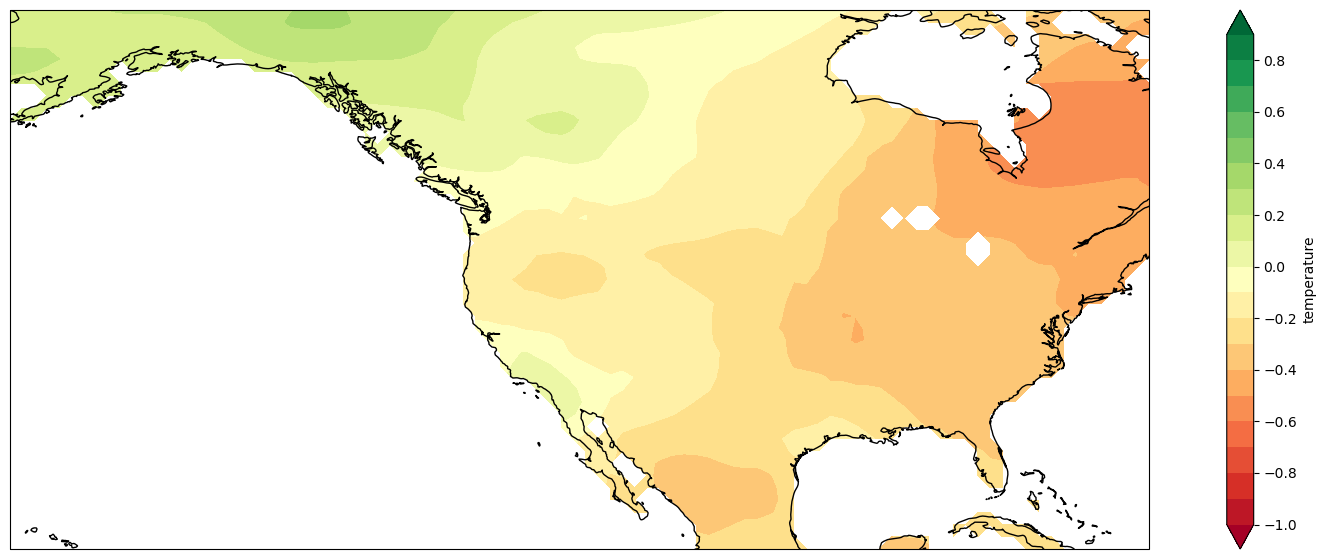

In [94]:
fig = plt.figure(figsize=[20, 7])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

clim_avgda.plot.contourf(ax=ax,
                   extend='both',
                   levels=np.arange(-1, 1, 0.1),
                   alpha=1,
                   transform=ccrs.PlateCarree(),
                   cmap='RdYlGn')
ax.coastlines()

plt.show()

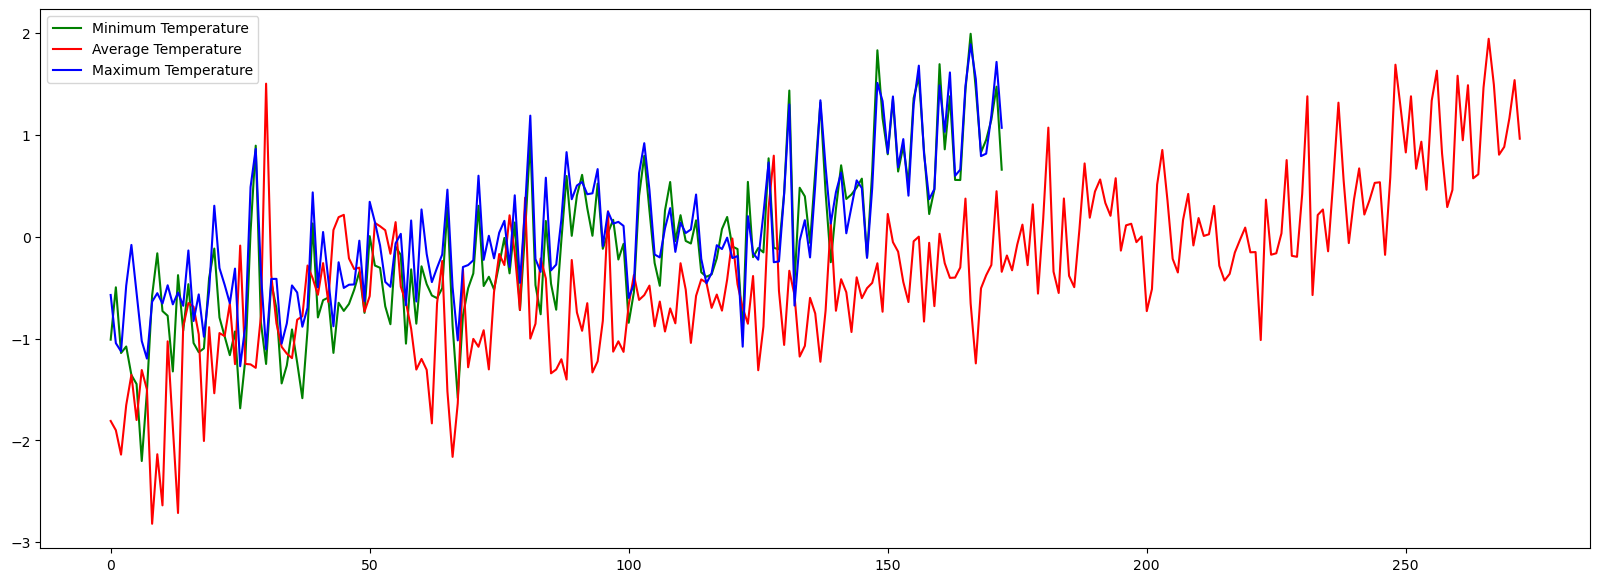

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.plot(analysis_minda.groupby('time.year').mean(...), color='g', label='Minimum Temperature')
ax.plot(analysis_avgda.groupby('time.year').mean(...), color='r', label='Average Temperature')
ax.plot(analysis_maxda.groupby('time.year').mean(...), color='b', label='Maximum Temperature')
plt.legend()
plt.show()

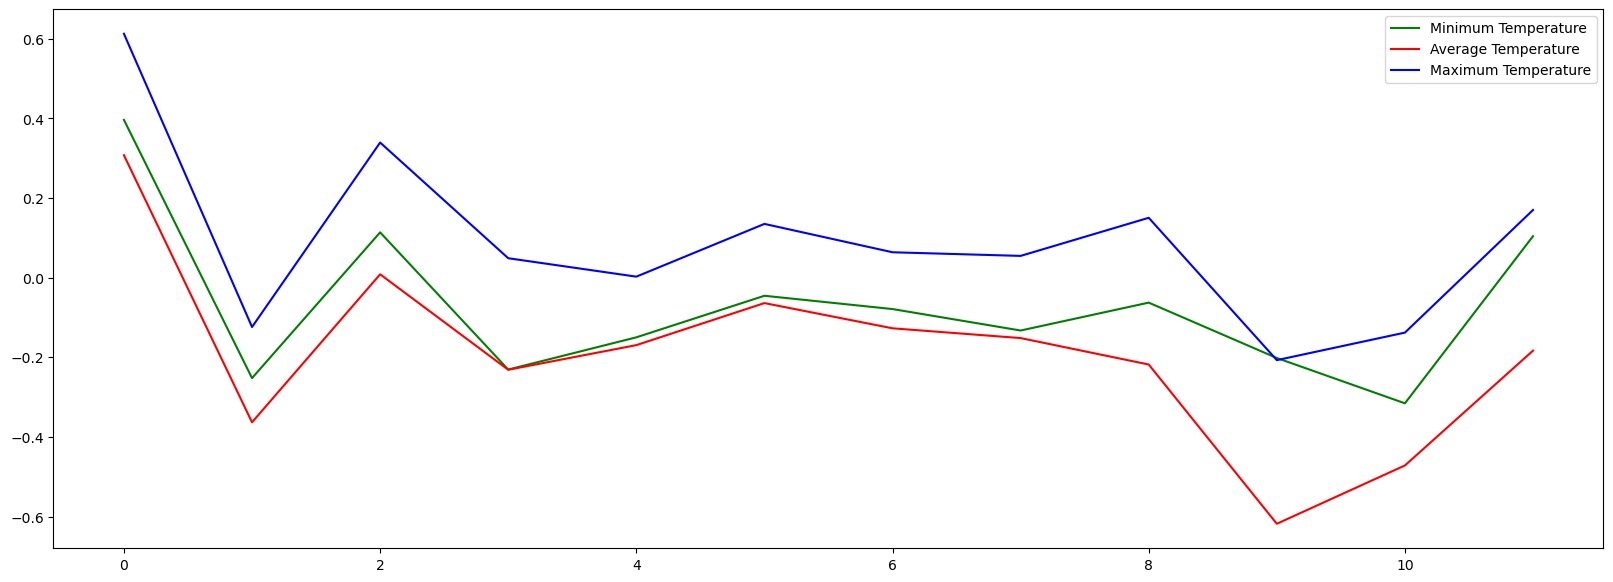

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.plot(analysis_minda.groupby('time.month').mean(...), color='g', label='Minimum Temperature')
ax.plot(analysis_avgda.groupby('time.month').mean(...), color='r', label='Average Temperature')
ax.plot(analysis_maxda.groupby('time.month').mean(...), color='b', label='Maximum Temperature')
plt.legend()
plt.show()

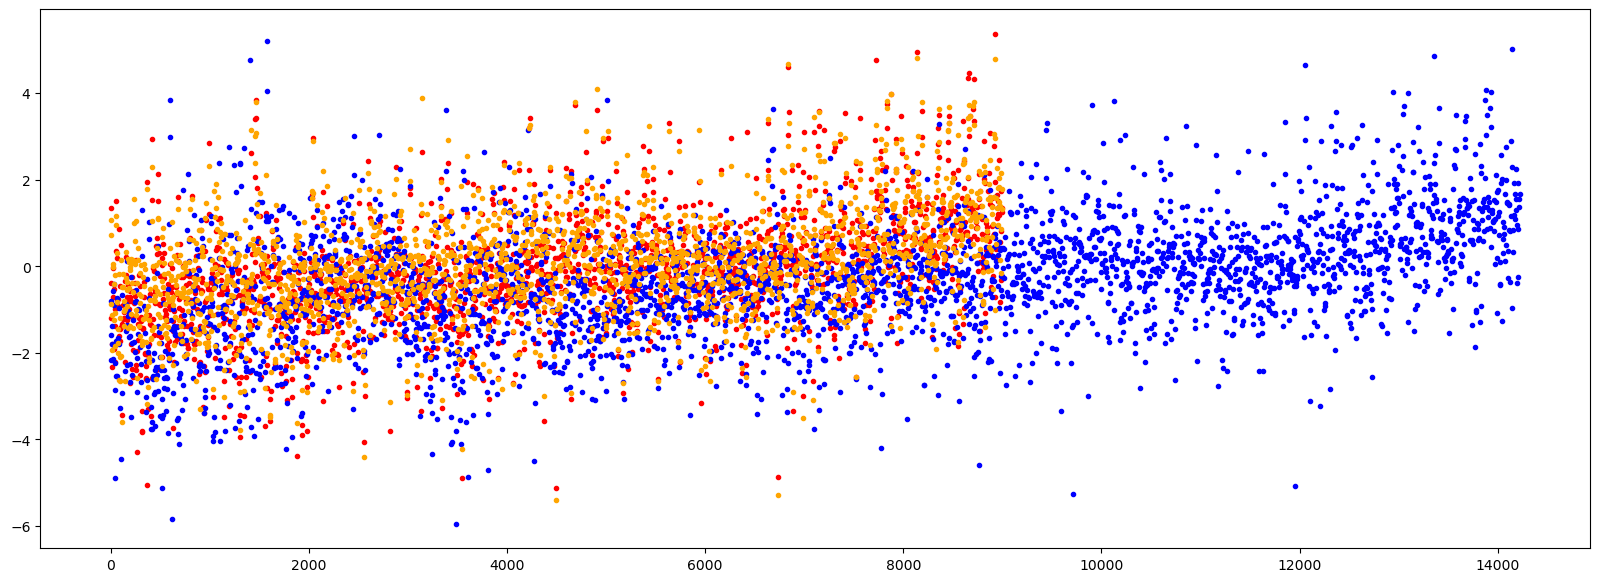

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.plot(analysis_minda.resample(time='7D').mean(...), marker='.', color='red')
ax.plot(analysis_avgda.resample(time='7D').mean(...), marker='.', color='blue')
ax.plot(analysis_maxda.resample(time='7D').mean(...), marker='.', color='orange')
plt.show()

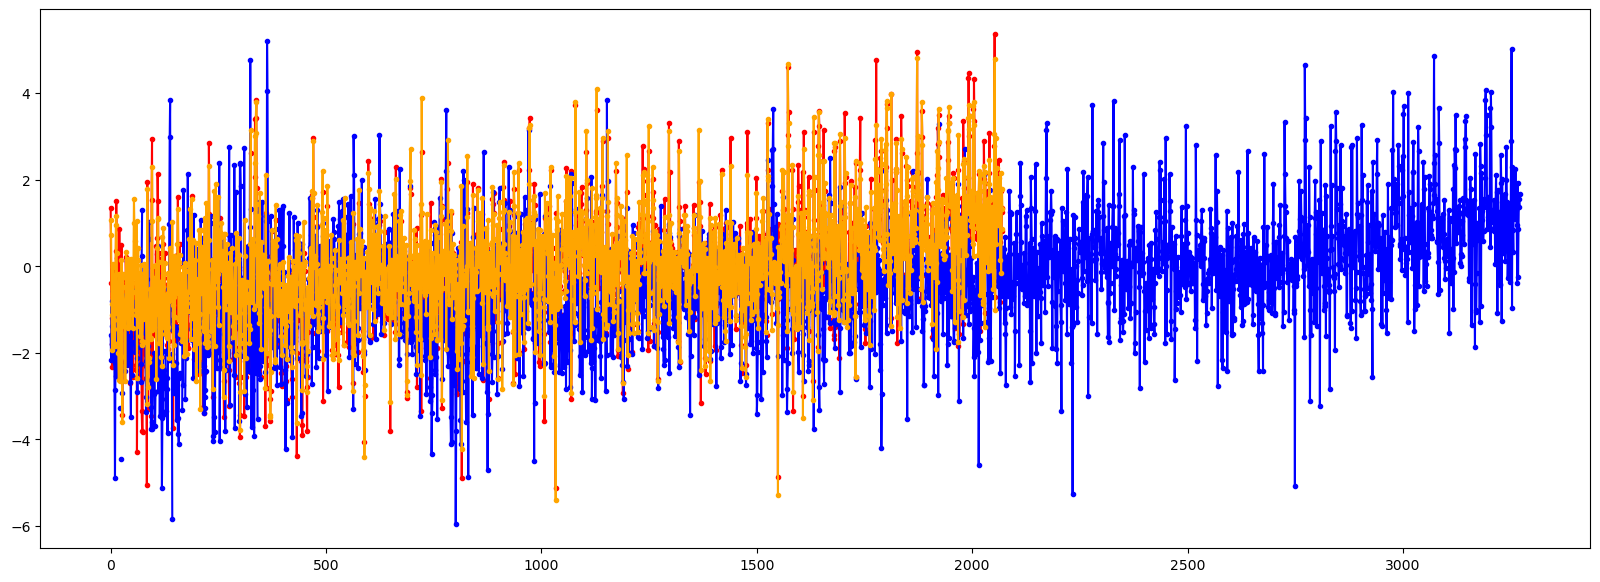

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.plot(analysis_minda.resample(time='MS').mean(...), marker='.', color='red')
ax.plot(analysis_avgda.resample(time='MS').mean(...), marker='.', color='blue')
ax.plot(analysis_maxda.resample(time='MS').mean(...), marker='.', color='orange')
plt.show()

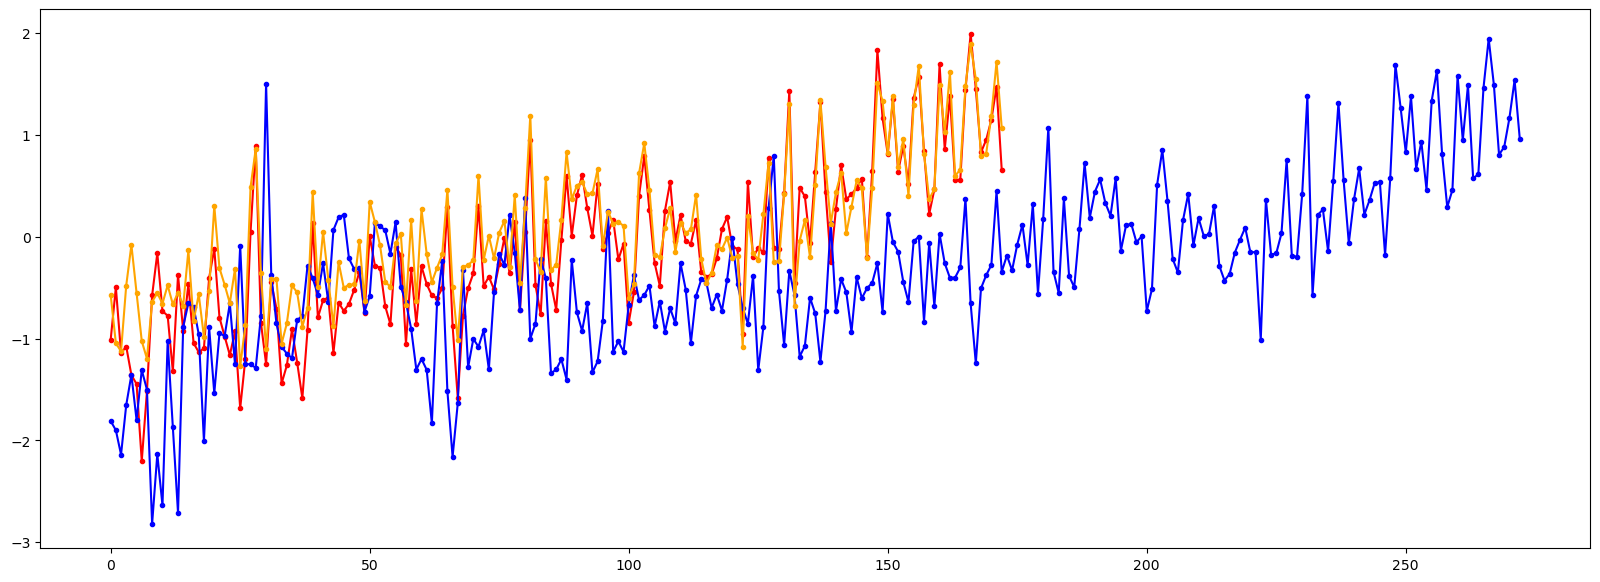

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.plot(analysis_minda.resample(time='1Y').mean(...), marker='.', color='red')
ax.plot(analysis_avgda.resample(time='1Y').mean(...), marker='.', color='blue')
ax.plot(analysis_maxda.resample(time='1Y').mean(...), marker='.', color='orange')
plt.show()

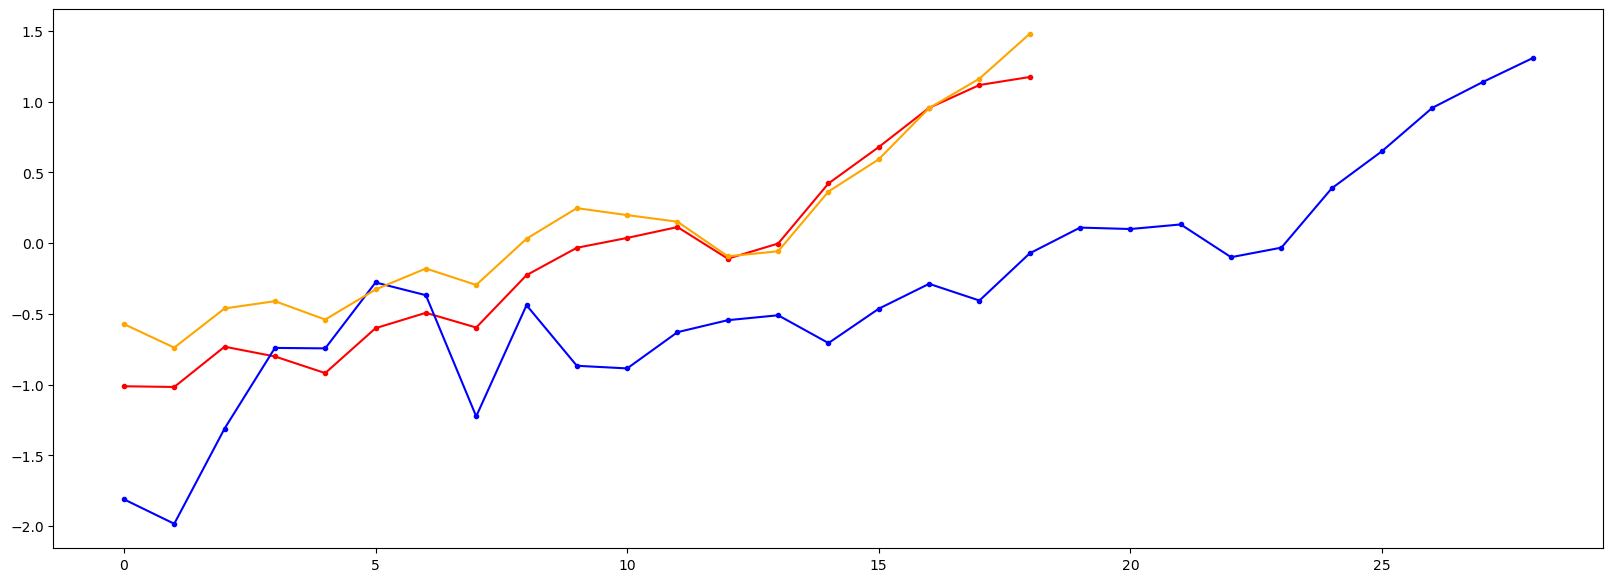

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.plot(analysis_minda.resample(time='10Y').mean(...), marker='.', color='red')
ax.plot(analysis_avgda.resample(time='10Y').mean(...), marker='.', color='blue')
ax.plot(analysis_maxda.resample(time='10Y').mean(...), marker='.', color='orange')
plt.show()

In [126]:
freeze_avgda = (analysis_avgda <= 0).groupby('time.month').mean('time')

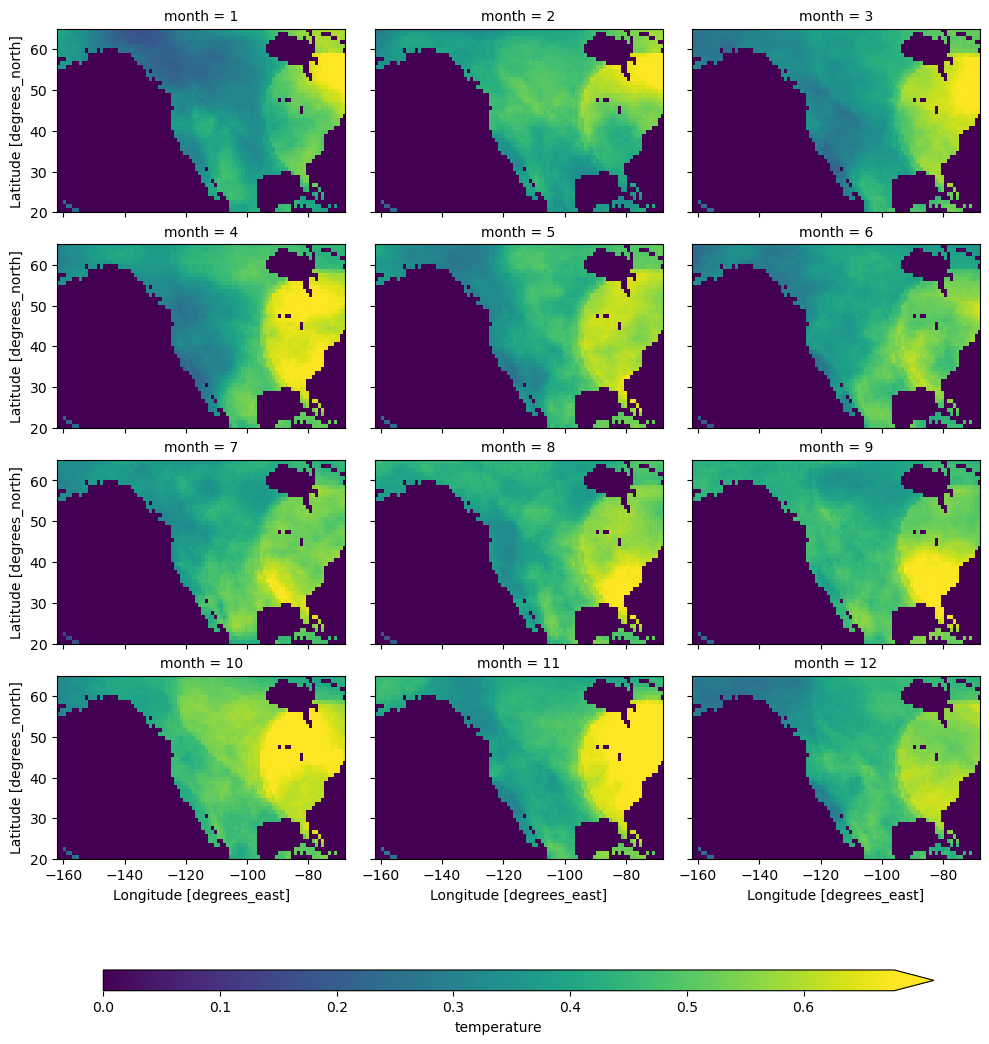

In [128]:
g = freeze_avgda.plot.imshow('longitude', 'latitude', col='month', col_wrap=3, robust=True,  cbar_kwargs={
    'orientation': 'horizontal',
    'shrink': 0.9,
    'aspect': 40,
    'pad':0.1
},)

In [133]:
temp_mean = analysis_avgda.groupby('time.month').mean('time')
temp_std = analysis_avgda.groupby('time.month').std('time')
stand_anomalies = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    analysis_avgda.groupby('time.month'),
    temp_mean,
    temp_std,
)

In [134]:
stand_anomalies

<xarray.DataArray 'temperature' (time: 3272, latitude: 45, longitude: 94)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 0.07618652,  0.01973297, -0.03280892, ...,  1.789324  ,
          1.6180879 ,  1.478799  ],
        [ 0.07889763,  0.02431342, -0.04596773, ...,  1.8423834 ,
          1.682171  ,  1.5384444 ],
        [-0.06040583, -0.14174819, -0.22320615, ...,  1.9287059 ,
          1.7584699 ,  1.5926797 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,  1.1713343 , ...,         nan,
                 nan,         nan],
        ...,
        [-0.27519944, -0.267415  , -0.23521979, ...,  1.3970653 ,
          1.3555672 ,  1.315018  ],
        [-0.261152  , -0.26613998, -0.25367254, ...,  1.3119222 ,
          1.2500474 ,  1.1897693 ],
        [-0.35685912, -0.3789795 , -0.39157972, ...,  1.2232772 ,
          1.1430213 ,  1.062274  ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -161.5 -160.5 -159.5 ... -70.5 -69.5 -68.5
  * latitude   (latitude) float32 20.5 21.5 22.5 23.5 ... 61.5 62.5 63.5 64.5
  * time       (time) datetime64[ns] 1750-01-01 1750-02-01 ... 2022-08-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8

In [135]:
print(stand_anomalies.min())
print(stand_anomalies.max())

<xarray.DataArray 'temperature' ()>
array(-4.81258154)
<xarray.DataArray 'temperature' ()>
array(4.79586411)


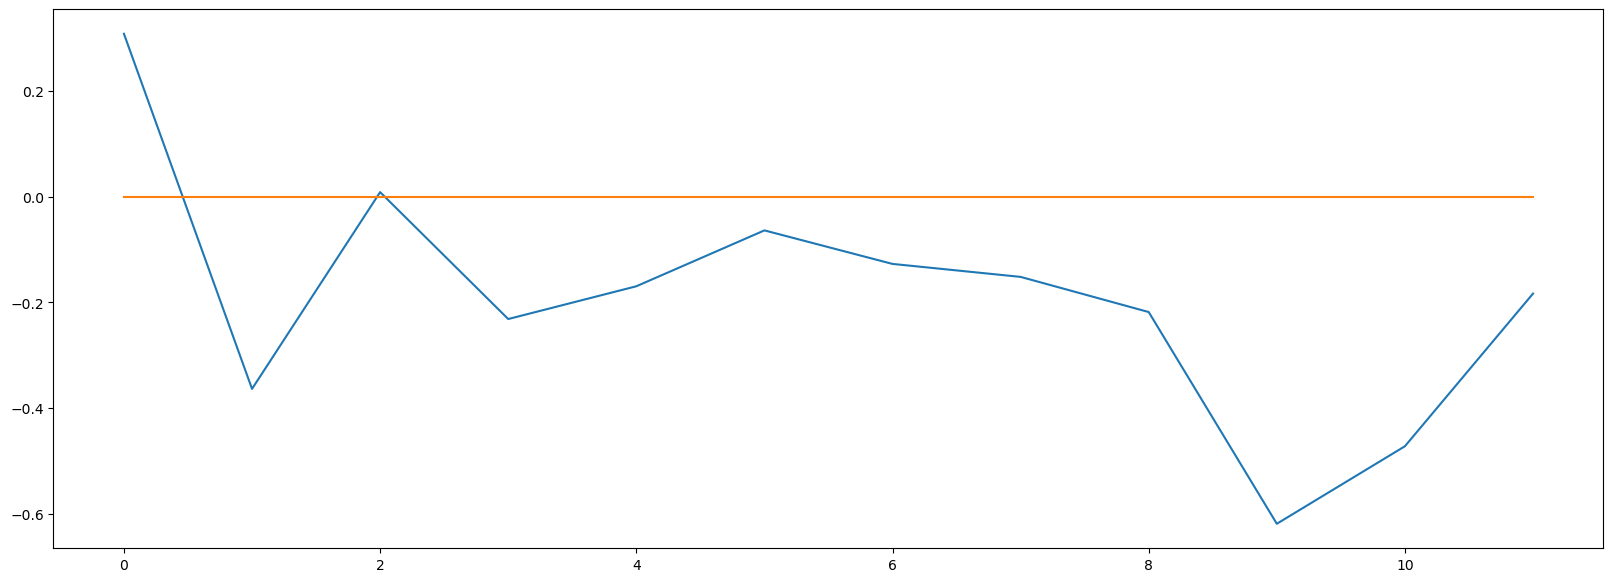

In [247]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.plot(analysis_avgda.groupby('time.month').mean(...))
ax.plot(stand_anomalies.groupby('time.month').mean(...))
plt.show()

In [137]:
month_length = analysis_avgda.time.dt.days_in_month
weights = (month_length.groupby('time.season') / month_length.groupby('time.season').sum())
weighted = (analysis_avgda * weights).groupby('time.season').sum(dim='time')
unweighted = analysis_avgda.groupby('time.season').mean('time')
diff = weighted - unweighted

In [140]:
print(weighted.min())
print(weighted.max())

print(unweighted.min())
print(unweighted.max())

print(diff.min())
print(diff.max())

<xarray.DataArray ()>
array(-1.16747619)
<xarray.DataArray ()>
array(0.89084082)
<xarray.DataArray 'temperature' ()>
array(-1.19687331)
<xarray.DataArray 'temperature' ()>
array(1.24395406)
<xarray.DataArray ()>
array(-0.35498166)
<xarray.DataArray ()>
array(0.22366119)


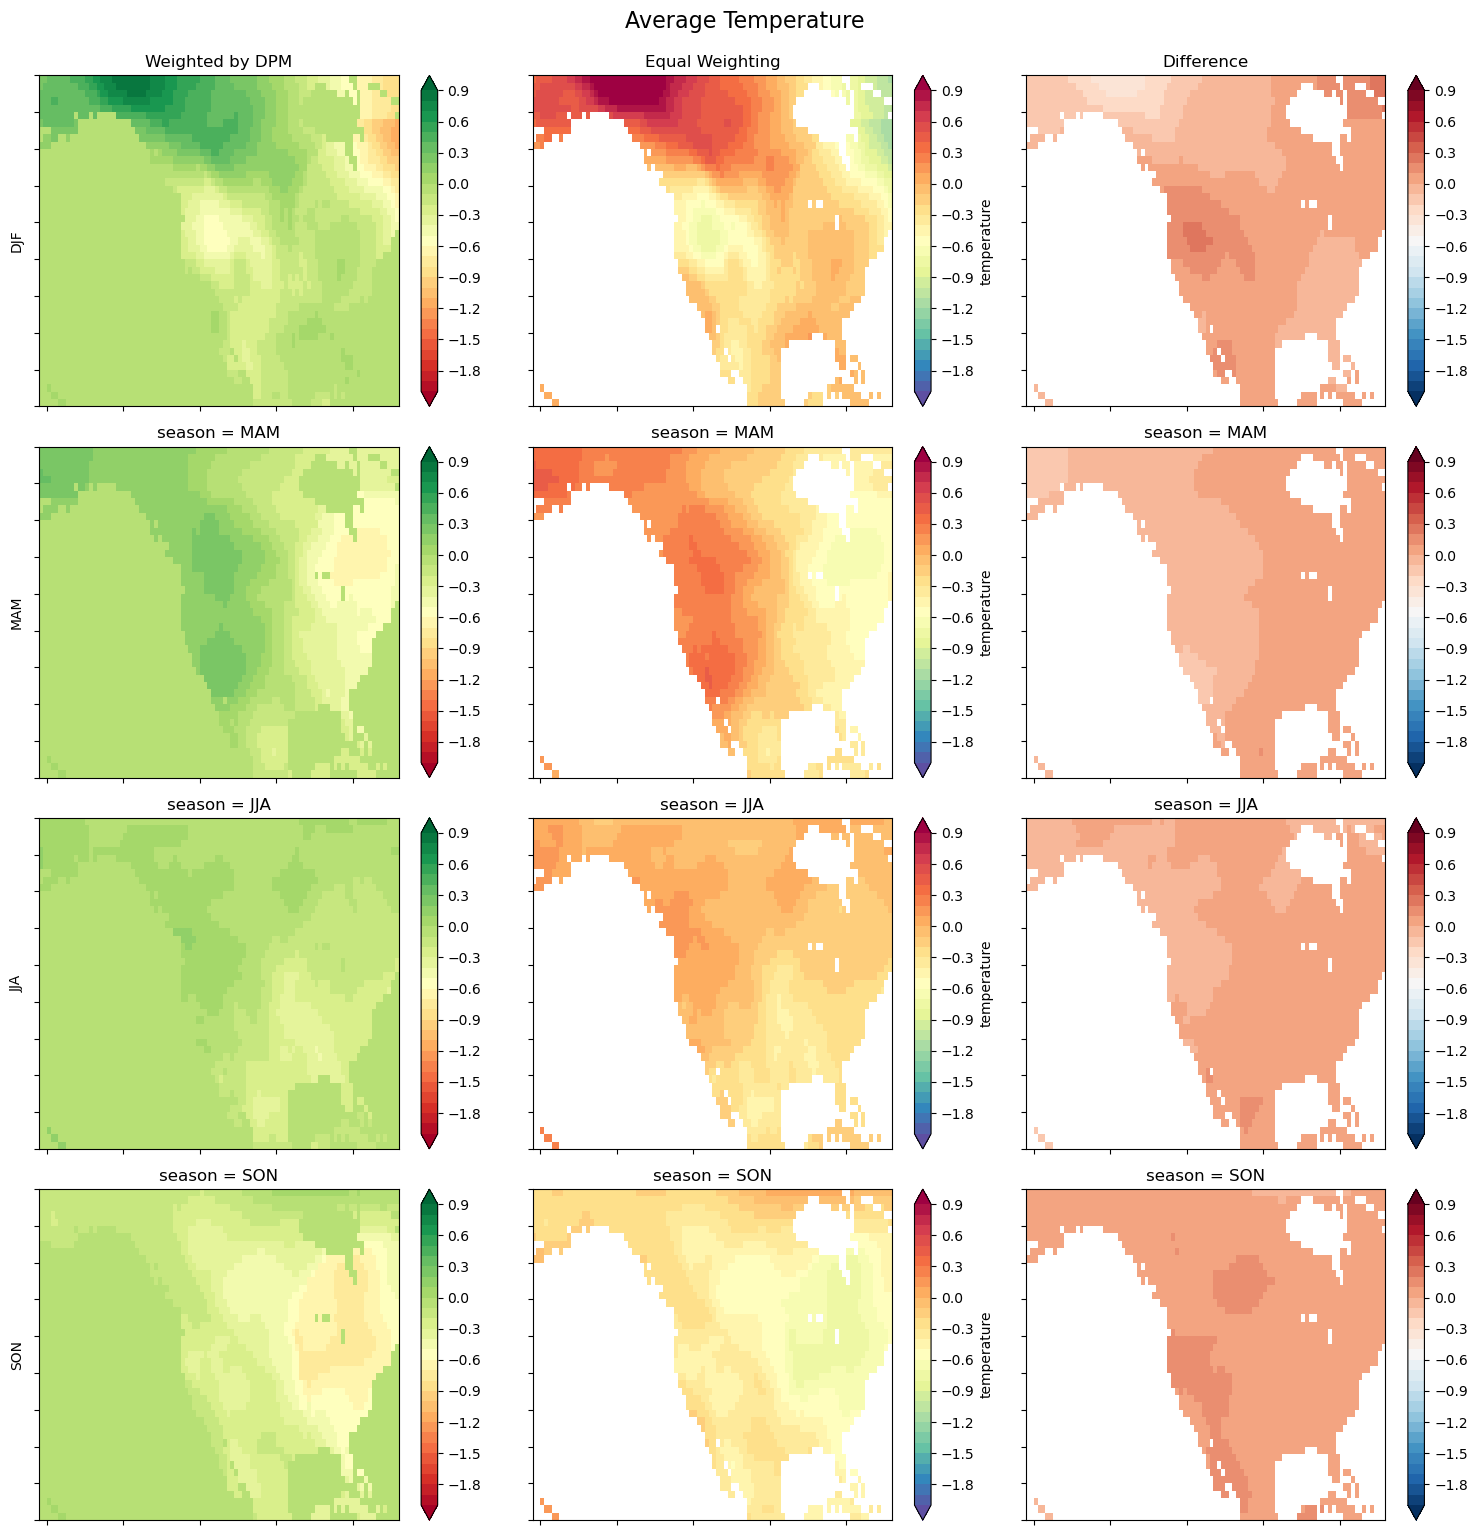

In [200]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
for i, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    weighted.sel(season=season).plot.pcolormesh(ax=axes[i, 0],
                                                        levels=np.arange(-2, 1, 0.1),
                                                        cmap='RdYlGn', 
                                                        add_colorbar=True, 
                                                        extend='both',)
    unweighted.sel(season=season).plot.pcolormesh(ax=axes[i, 1],
                                                        levels=np.arange(-2, 1, 0.1),
                                                        cmap='Spectral_r',
                                                        add_colorbar=True,
                                                        extend='both',)
    diff.sel(season=season).plot.pcolormesh(ax=axes[i, 2],
                                                        levels=np.arange(-2, 1, 0.1),
                                                        cmap='RdBu_r',
                                                        add_colorbar=True,
                                                        extend='both',)
    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel('')
    axes[i, 2].set_ylabel('')
    
    for ax in axes.flat:
        ax.axes.get_xaxis().set_ticklabels([])
        ax.axes.get_yaxis().set_ticklabels([])
        ax.axes.axis('tight')
        ax.set_xlabel('')
        
axes[0, 0].set_title('Weighted by DPM')
axes[0, 1].set_title('Equal Weighting')
axes[0, 2].set_title('Difference')

plt.tight_layout()

fig.suptitle('Average Temperature', fontsize=16, y=1.02)
plt.show()

In [12]:
weights_lat_avg = np.cos(np.deg2rad(analysis_avgda))
weights_lat_min = np.cos(np.deg2rad(analysis_minda))
weights_lat_max = np.cos(np.deg2rad(analysis_maxda))

In [13]:
est_mean_wrong_lat_avg = (analysis_avgda * weights_lat_avg).sum(dim=('latitude', 'longitude')) / weights_lat_avg.sum(dim=('latitude'))
est_mean_wrong_lat_min = (analysis_minda * weights_lat_min).sum(dim=('latitude', 'longitude')) / weights_lat_min.sum(dim=('latitude'))
est_mean_wrong_lat_max = (analysis_maxda * weights_lat_max).sum(dim=('latitude', 'longitude')) / weights_lat_max.sum(dim=('latitude'))

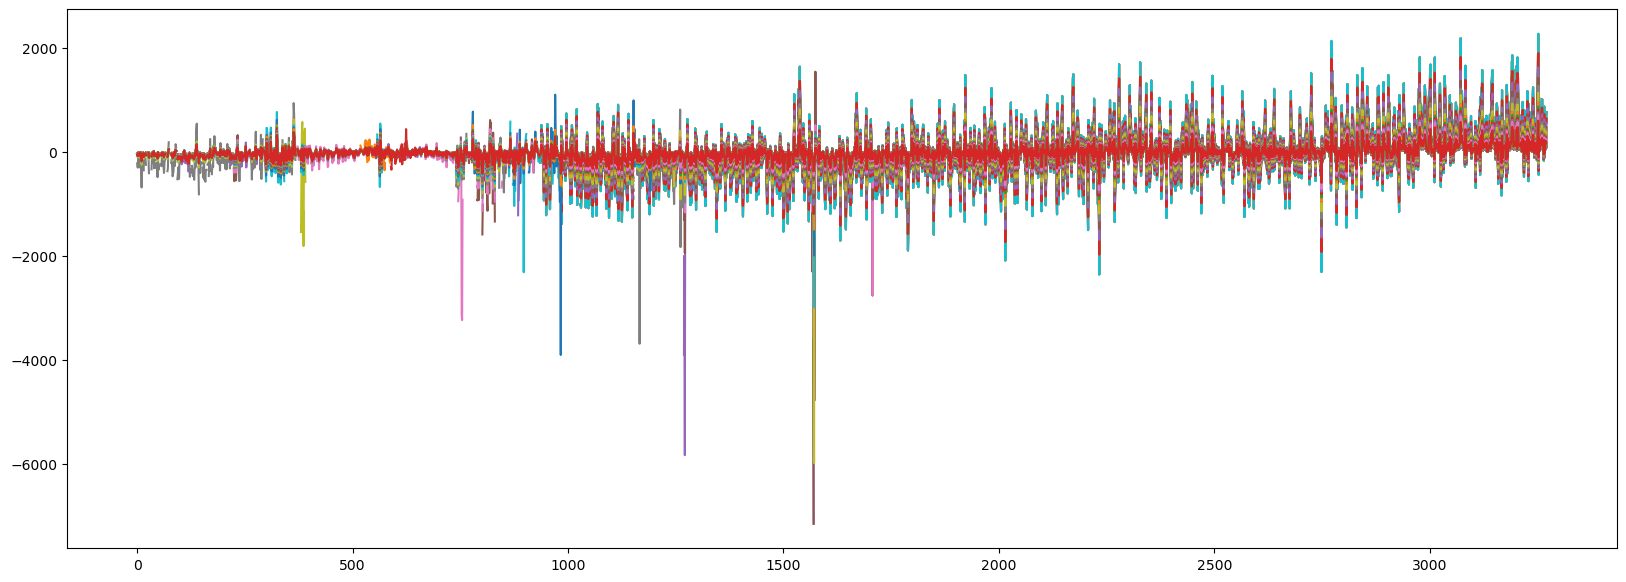

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.plot(est_mean_wrong_lat_avg)
#ax.plot(est_mean_wrong_lat_min)
#ax.plot(est_mean_wrong_lat_max)
plt.show()

In [154]:
clim_avg = analysis_avgda.sel(time=slice('1750-01-01', '1850-01-01')).mean('time')
clim_avg

<xarray.DataArray 'temperature' (latitude: 45, longitude: 94)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.685042  , -0.68082714, -0.6789669 , ..., -1.0229962 ,
        -1.0260098 , -1.0314702 ],
       [-0.69659853, -0.68973595, -0.6853912 , ..., -1.0150864 ,
        -1.0212704 , -1.0266002 ],
       [-0.70894134, -0.70177335, -0.6953175 , ..., -0.9908518 ,
        -0.99927133, -1.0069948 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -161.5 -160.5 -159.5 ... -70.5 -69.5 -68.5
  * latitude   (latitude) float32 20.5 21.5 22.5 23.5 ... 61.5 62.5 63.5 64.5

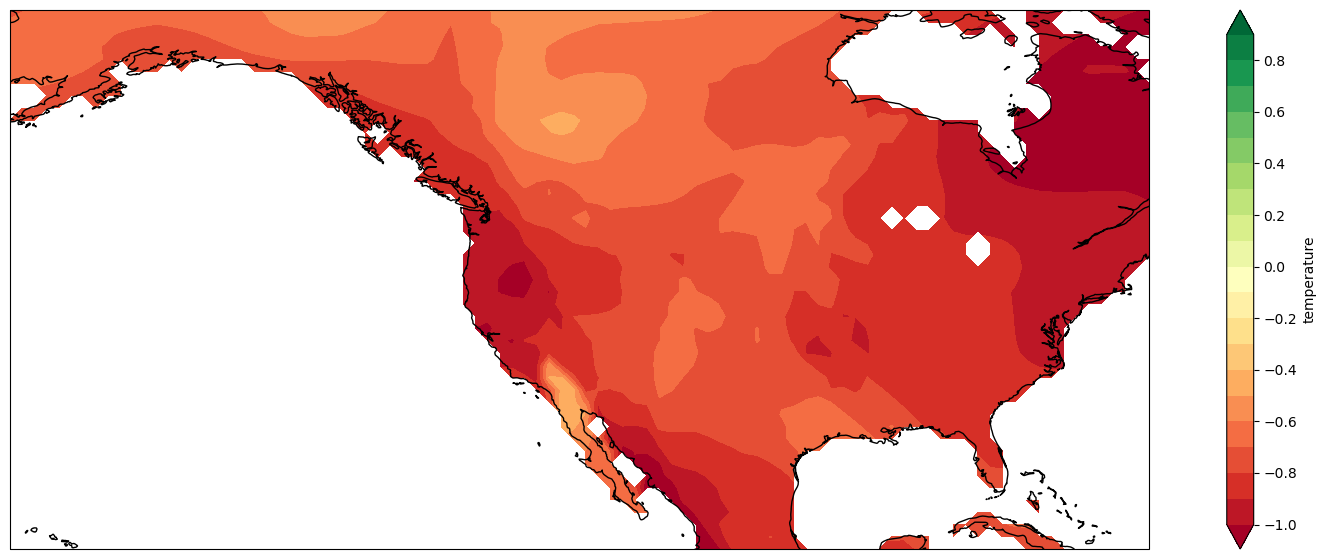

In [192]:
fig = plt.figure(figsize=[20, 7])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

clim_avg.plot.contourf(ax=ax,
                   extend='both',
                   levels=np.arange(-1, 1, 0.1),
                   alpha=1,
                   transform=ccrs.PlateCarree(),
                   cmap='RdYlGn')
ax.coastlines()

plt.show()

In [159]:
clim_avg0 = analysis_avgda.sel(time=slice('1850-01-01', '1949-12-31')).mean('time')
clim_avg0

<xarray.DataArray 'temperature' (latitude: 45, longitude: 94)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan, -0.17857395, ...,         nan,
                nan,         nan],
       ...,
       [-0.04287998, -0.0369379 , -0.03460732, ..., -0.60701513,
        -0.6054393 , -0.6062868 ],
       [-0.06696236, -0.0568679 , -0.05019565, ..., -0.5965796 ,
        -0.5989224 , -0.6004488 ],
       [-0.09174669, -0.08025245, -0.06974996, ..., -0.5696007 ,
        -0.57451713, -0.5787475 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -161.5 -160.5 -159.5 ... -70.5 -69.5 -68.5
  * latitude   (latitude) float32 20.5 21.5 22.5 23.5 ... 61.5 62.5 63.5 64.5

In [191]:
fig = plt.figure(figsize=[20, 7])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

clim_avg0.plot.contourf(ax=ax,
                   extend='both',
                   levels=np.arange(-1, 1, 0.1),
                   alpha=1,
                   transform=ccrs.PlateCarree(),
                   cmap='RdYlGn')
ax.coastlines()

plt.show()

In [163]:
clim_avg1 = analysis_avgda.sel(time=slice('1950-01-01', '2000-01-01')).mean('time')
clim_avg1

<xarray.DataArray 'temperature' (latitude: 45, longitude: 94)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,  0.2545716 , ...,         nan,
                nan,         nan],
       ...,
       [ 0.2545528 ,  0.25994465,  0.26438257, ..., -0.12281586,
        -0.13228369, -0.14156555],
       [ 0.24736996,  0.2535807 ,  0.2590589 , ..., -0.1306226 ,
        -0.14043207, -0.1490845 ],
       [ 0.23947024,  0.24467635,  0.24973704, ..., -0.1241985 ,
        -0.1352117 , -0.14553964]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -161.5 -160.5 -159.5 ... -70.5 -69.5 -68.5
  * latitude   (latitude) float32 20.5 21.5 22.5 23.5 ... 61.5 62.5 63.5 64.5

In [190]:
fig = plt.figure(figsize=[20, 7])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

clim_avg1.plot.contourf(ax=ax,
                   extend='both',
                   levels=np.arange(-1, 1, 0.1),
                   alpha=1,
                   transform=ccrs.PlateCarree(),
                   cmap='RdYlGn')
ax.coastlines()

plt.show()

In [165]:
clim_avg2 = analysis_avgda.sel(time=slice('2000-01-01', '2022-01-01')).mean('time')
clim_avg2

<xarray.DataArray 'temperature' (latitude: 45, longitude: 94)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan, 0.95950824, ...,        nan,        nan,
               nan],
       ...,
       [1.6550316 , 1.6565645 , 1.6565114 , ..., 1.1639293 , 1.1552131 ,
        1.1414148 ],
       [1.674455  , 1.6781446 , 1.6808115 , ..., 1.1928737 , 1.1773121 ,
        1.1609755 ],
       [1.6944579 , 1.6999824 , 1.7053386 , ..., 1.2400235 , 1.2204095 ,
        1.200691  ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -161.5 -160.5 -159.5 ... -70.5 -69.5 -68.5
  * latitude   (latitude) float32 20.5 21.5 22.5 23.5 ... 61.5 62.5 63.5 64.5

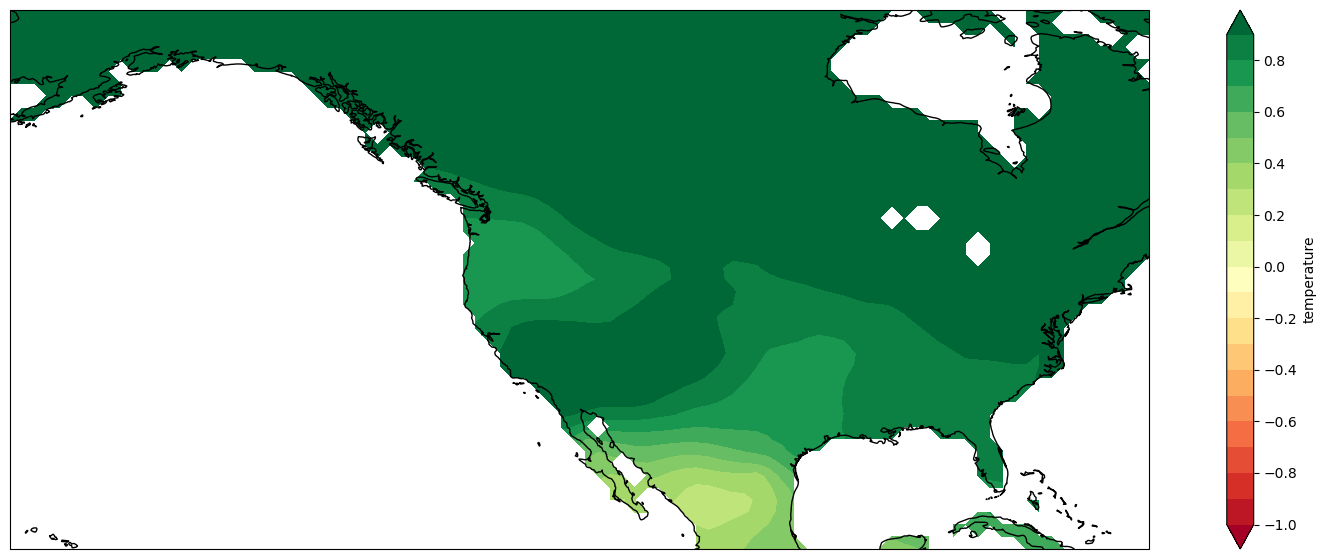

In [258]:
fig = plt.figure(figsize=[20, 7])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

clim_avg2.plot.contourf(ax=ax,
                   extend='both',
                   levels=np.arange(-1, 1, 0.1),
                   alpha=1,
                   transform=ccrs.PlateCarree(),
                   cmap='RdYlGn')
ax.coastlines()

plt.show()

In [167]:
monthly_mean = analysis_avgda.groupby('time.month').mean()
monthly_mean

<xarray.DataArray 'temperature' (month: 12, latitude: 45, longitude: 94)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,  5.0591171e-02, ...,
                    nan,            nan,            nan],
        ...,
        [-3.2716790e-01, -2.1756202e-01, -1.3455051e-01, ...,
         -1.3434653e+00, -1.3556192e+00, -1.3798820e+00],
        [-4.4271079e-01, -3.0326003e-01, -1.9632277e-01, ...,
         -1.4419127e+00, -1.4659420e+00, -1.4859245e+00],
        [-6.0039163e-01, -4.6262482e-01, -3.3311039e-01, ...,
         -1.5214481e+00, -1.5535717e+00, -1.5829558e+00]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,  1.3589951e-01, ...,
                    nan,            nan,            nan],
...
        [-8.0051214e-01, -8.1722188e-01, -8.2492912e-01, ...,
         -3.5644647e-01, -3.5242173e-01, -3.4749970e-01],
        [-7.7741468e-01, -7.9387891e-01, -7.8973764e-01, ...,
         -1.8620421e-01, -1.8859059e-01, -1.9004928e-01],
        [-7.3916489e-01, -7.5115448e-01, -7.5596392e-01, ...,
          5.0410968e-03, -4.6966955e-04, -4.8814453e-03]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,  8.6468130e-02, ...,
                    nan,            nan,            nan],
        ...,
        [ 9.8816913e-01,  1.0334351e+00,  1.0714290e+00, ...,
         -1.2064777e-01, -1.2971874e-01, -1.4389606e-01],
        [ 9.7153330e-01,  1.0012946e+00,  1.0043023e+00, ...,
         -5.8367122e-02, -6.9959469e-02, -8.2510762e-02],
        [ 9.5237190e-01,  9.5885253e-01,  9.5482153e-01, ...,
         -2.0825580e-02, -2.9880594e-02, -3.9094415e-02]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -161.5 -160.5 -159.5 ... -70.5 -69.5 -68.5
  * latitude   (latitude) float32 20.5 21.5 22.5 23.5 ... 61.5 62.5 63.5 64.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [168]:
monthly_mean.max(), monthly_mean.min()

(<xarray.DataArray 'temperature' ()>
 array(2.3350594),
 <xarray.DataArray 'temperature' ()>
 array(-1.71364224))

In [169]:
monthly_mean.plot(col='month', col_wrap=4, robust=True, cmap='jet', cbar_kwargs={
    'orientation': 'horizontal',
    'shrink': 0.8,
    'aspect': 40,
    'pad':0.1
},)
plt.show()

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.plot(analysis_avgda.sel(time=slice('1750-01-01', '2022-01-01')).groupby('time.month').mean(...), label='Total Monthly Mean Data (1750-01-01, 2022-01-01)')
ax.plot(analysis_avgda.sel(time=slice('1750-01-01', '1850-01-01')).groupby('time.month').mean(...), label='Total Monthly Mean Data (1750-01-01 - 1850-01-01)')
ax.plot(analysis_avgda.sel(time=slice('1850-01-01', '1950-01-01')).groupby('time.month').mean(...), label='Total Monthly Mean Data (1850-01-01 - 1950-01-01)')
ax.plot(analysis_avgda.sel(time=slice('1950-01-01', '2000-01-01')).groupby('time.month').mean(...), label='Total Monthly Mean Data (1900-01-01 - 2000-01-01)')
ax.plot(analysis_avgda.sel(time=slice('2000-01-01', '2022-01-01')).groupby('time.month').mean(...), label='Total Monthly Mean Data (2000-01-01 - 2022-01-01)')
plt.legend()
plt.show()

In [177]:
yearly_avg = analysis_avgda.groupby('time.year').mean(...)

In [178]:
yearly_avg_rolling_1y = yearly_avg.rolling(year=1).mean(...)
yearly_avg_rolling_5y = yearly_avg.rolling(year=5).mean(...)
yearly_avg_rolling_10y = yearly_avg.rolling(year=10).mean(...)
yearly_avg_rolling_50y = yearly_avg.rolling(year=50).mean(...)
yearly_avg_rolling_100y = yearly_avg.rolling(year=100).mean(...)

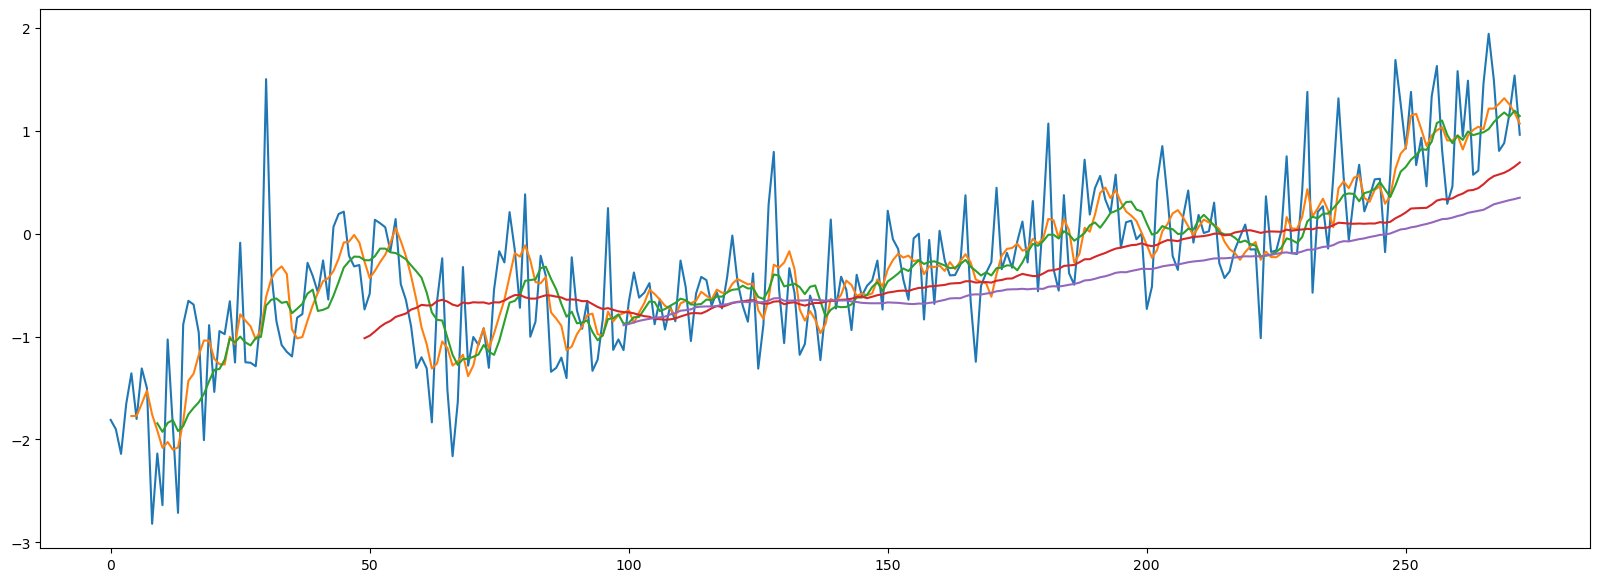

In [179]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.plot(yearly_avg_rolling_1y)
ax.plot(yearly_avg_rolling_5y)
ax.plot(yearly_avg_rolling_10y)
ax.plot(yearly_avg_rolling_50y)
ax.plot(yearly_avg_rolling_100y)
plt.show()

In [183]:
northern_h = avgda['temperature'].where(avgda['land_mask']==1).sel(latitude=slice(0.5, 89.5)).mean('time')

In [184]:
print(northern_h.min())
print(northern_h.max())

<xarray.DataArray 'temperature' ()>
array(-0.65603864)
<xarray.DataArray 'temperature' ()>
array(0.47161123)


In [185]:
fig = plt.figure(figsize=[20, 7])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

northern_h.plot.contourf(ax=ax,
                   extend='both',
                   levels=np.arange(-1, 1, 0.1),
                   alpha=1,
                   transform=ccrs.PlateCarree(),
                   cmap='RdYlGn')
ax.coastlines()

plt.show()

In [214]:
northern_h = avgda['temperature'].where(avgda['land_mask']==1).sel(latitude=slice(0.5, 89.5)).groupby('time.year').mean(...)
northern_h.plot(figsize=(20, 7))
plt.show()

In [186]:
southern_h = avgda['temperature'].where(avgda['land_mask']==1).sel(latitude=slice(-89.5, -0.5)).mean('time')

In [187]:
print(southern_h.min())
print(southern_h.max())

<xarray.DataArray 'temperature' ()>
array(-0.24118674)
<xarray.DataArray 'temperature' ()>
array(0.46711722)


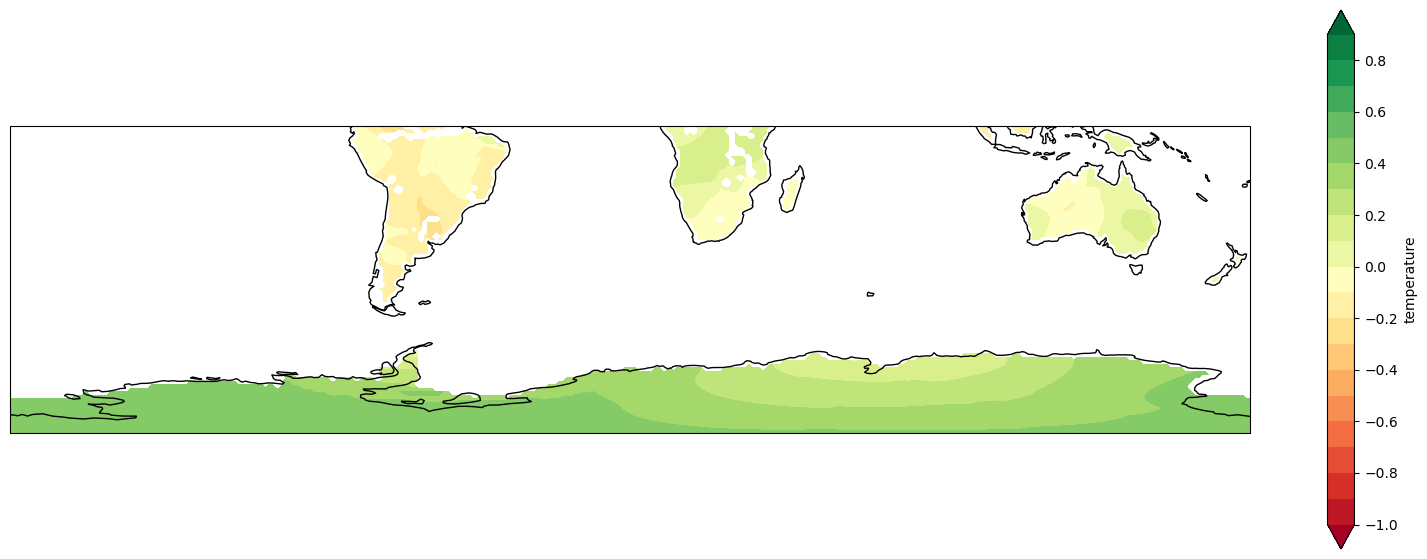

In [188]:
fig = plt.figure(figsize=[20, 7])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

southern_h.plot.contourf(ax=ax,
                   extend='both',
                   levels=np.arange(-1, 1, 0.1),
                   alpha=1,
                   transform=ccrs.PlateCarree(),
                   cmap='RdYlGn')
ax.coastlines()

plt.show()

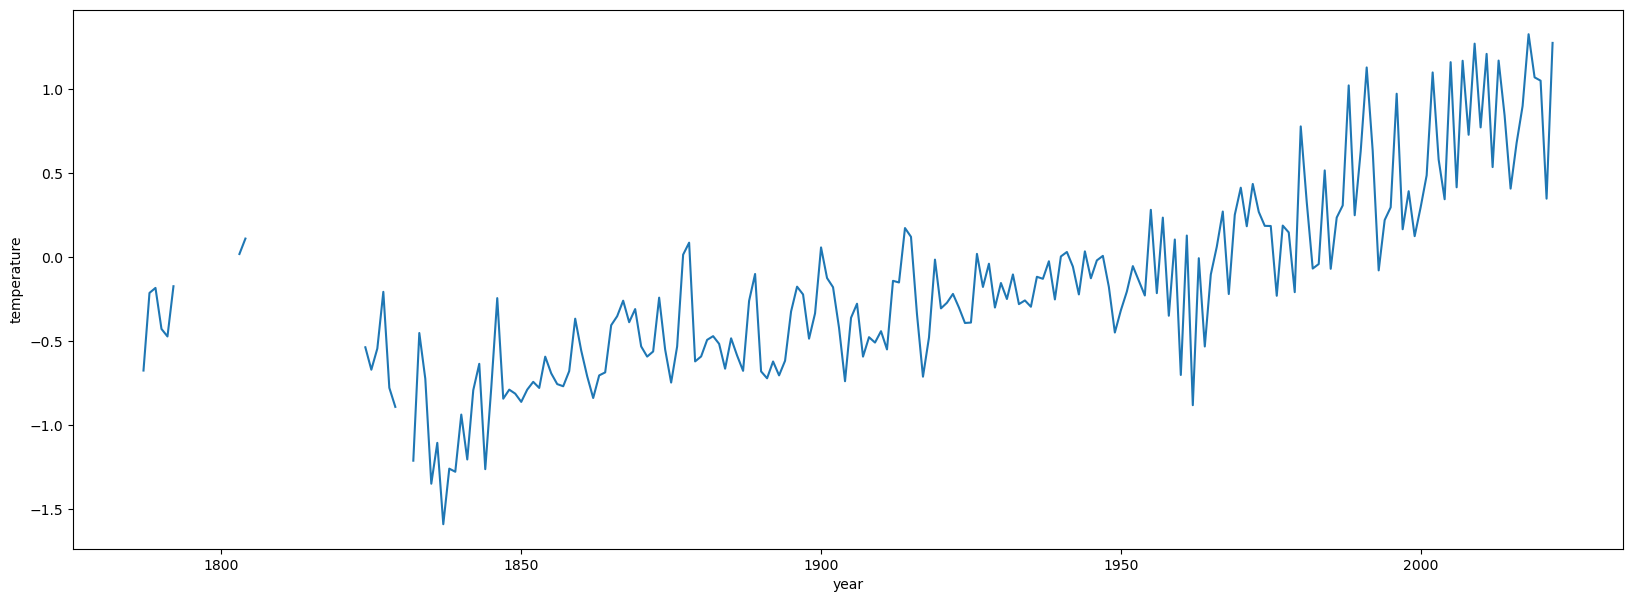

In [211]:
southern_h = avgda['temperature'].where(avgda['land_mask']==1).sel(latitude=slice(-89.5, -0.5)).groupby('time.year').mean(...)
southern_h.plot(figsize=(20, 7))
plt.show()

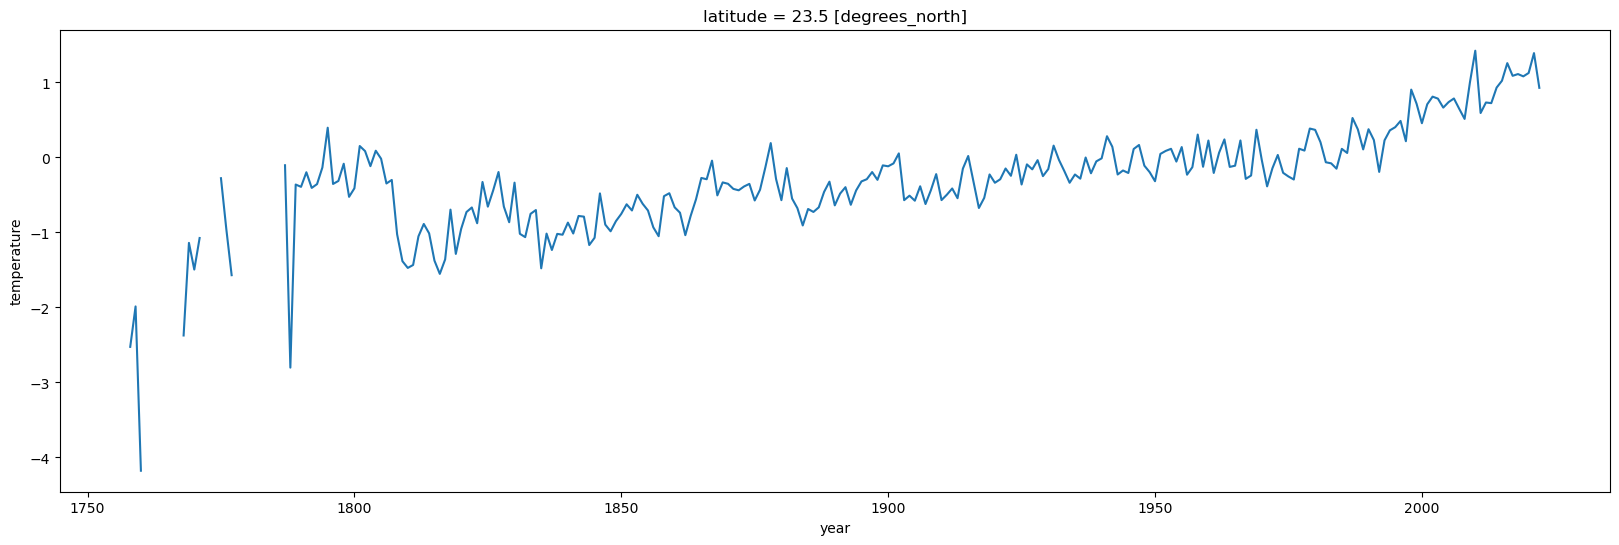

In [212]:
tropic_of_cancer = avgda['temperature'].sel(latitude=23.5).groupby('time.year').mean(...)
tropic_of_cancer.plot(figsize=(20, 6))
plt.show()

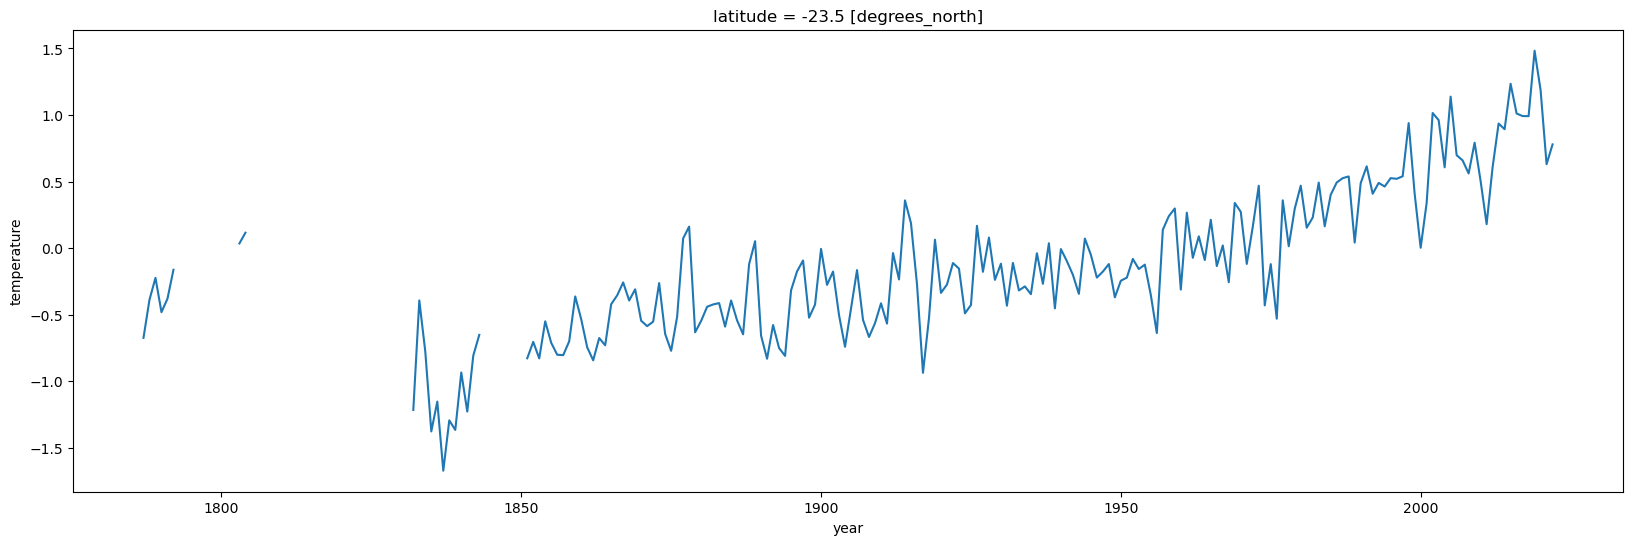

In [213]:
tropic_of_capricon = avgda['temperature'].sel(latitude=-23.5).groupby('time.year').mean(...)
tropic_of_capricon.plot(figsize=(20, 6))
plt.show()

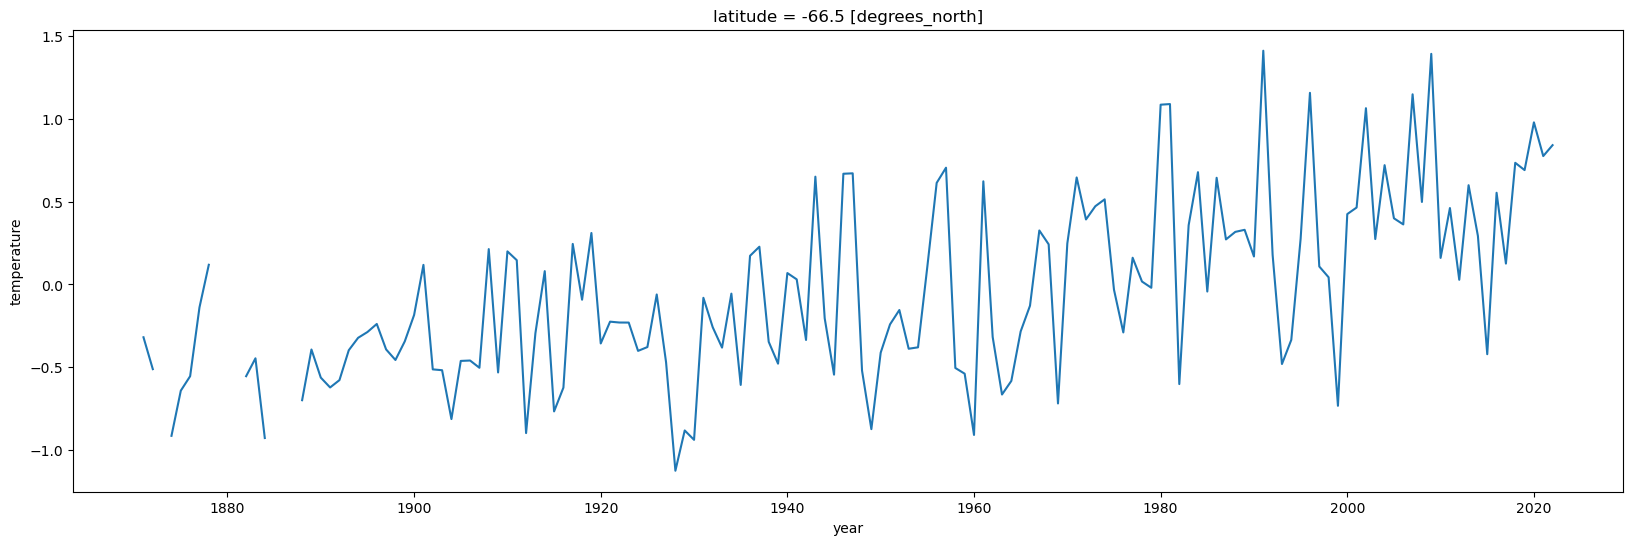

In [215]:
antartic_circle = avgda['temperature'].sel(latitude=-66.5).groupby('time.year').mean(...)
antartic_circle.plot(figsize=(20, 6))
plt.show()

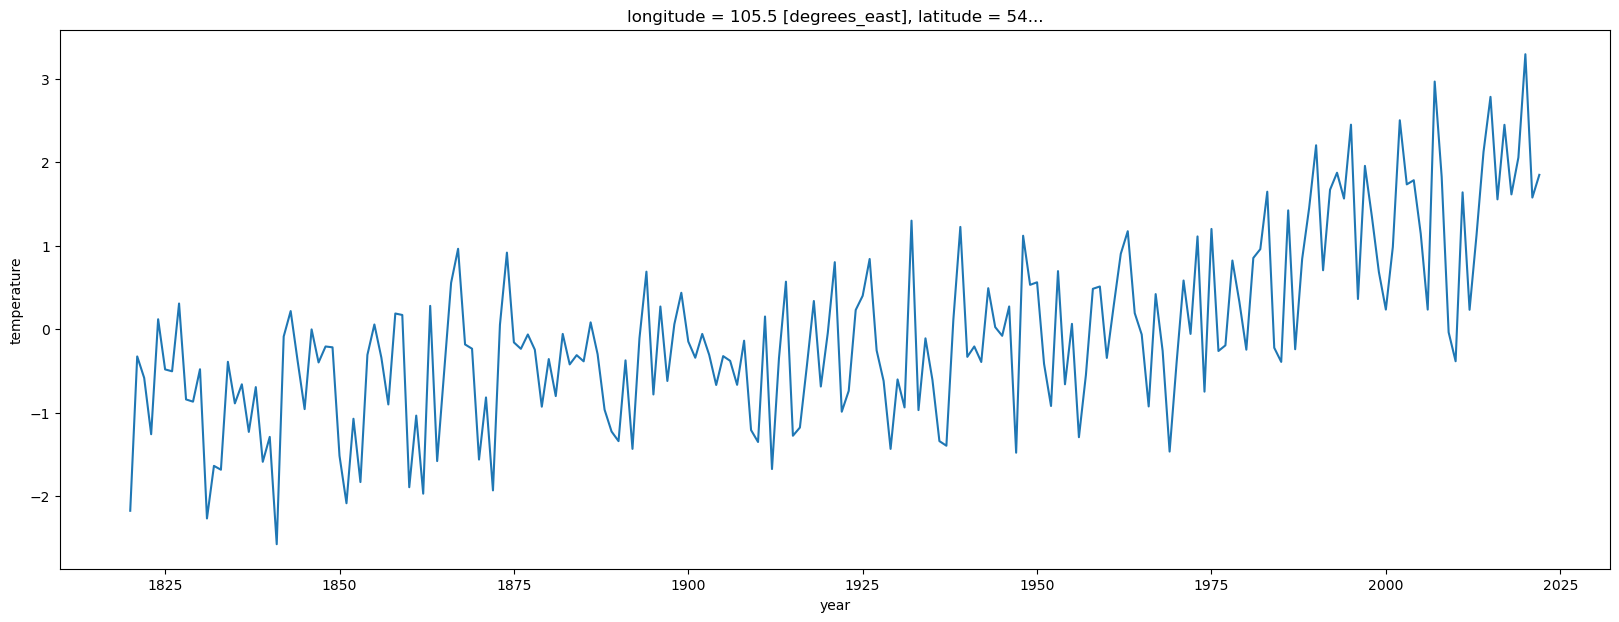

In [217]:
north_america = avgda['temperature'].sel(longitude=105.5, latitude=54.5).groupby('time.year').mean('time')
north_america.plot(figsize=(20, 7))
plt.show()

In [228]:
cdd = analysis_maxda.where(analysis_maxda.values <= 18)
cdd = 18 - cdd

In [231]:
cdd.groupby('time.year').mean(...).plot(figsize=(20, 7))

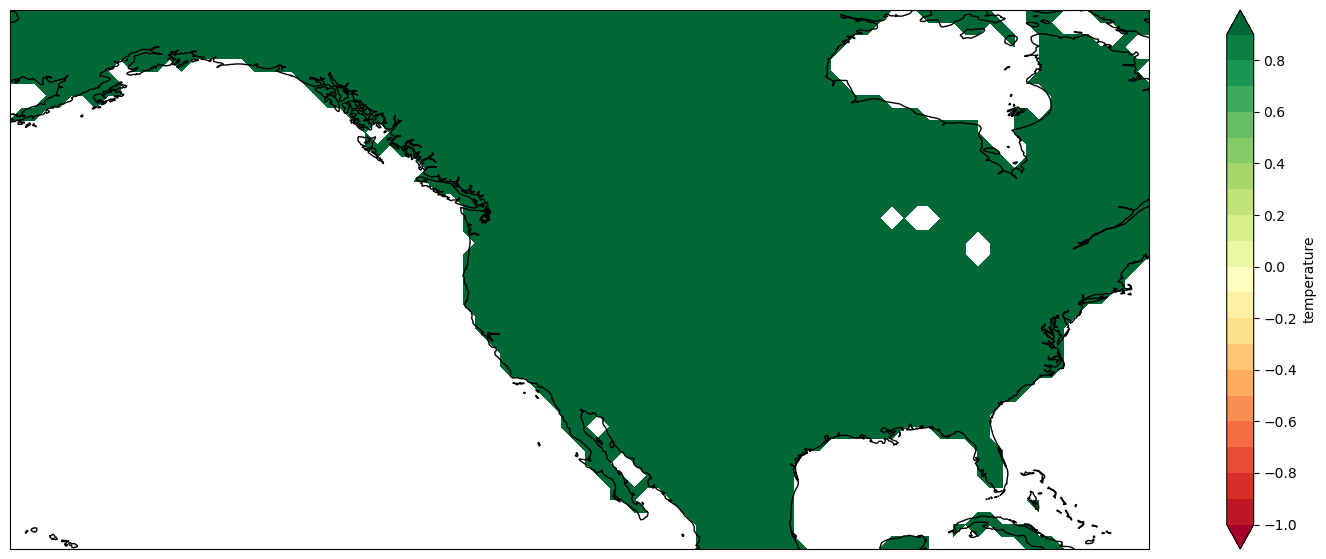

In [235]:
fig = plt.figure(figsize=[20, 7])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

cdd.mean('time').plot.contourf(ax=ax,
                   extend='both',
                   levels=np.arange(-1, 1, 0.1),
                   alpha=1,
                   transform=ccrs.PlateCarree(),
                   cmap='RdYlGn')
ax.coastlines()

plt.show()

In [236]:
average_temperature = analysis_avgda.groupby('time.year').mean(...)

In [237]:
pmk.original_test(average_temperature)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=13.48905626600985, Tau=0.5477806507218272, s=20338.0, var_s=2273058.6666666665, slope=0.007453824219743487, intercept=-1.3900235878617073)

In [1]:
def state_mean(lat, lon):
    state = analysis_avgda.sel(latitude=lat, longitude=lon)
    mean_ = state.groupby('time.year').mean(...)
    return mean_.plot(figsize=(20, 7))

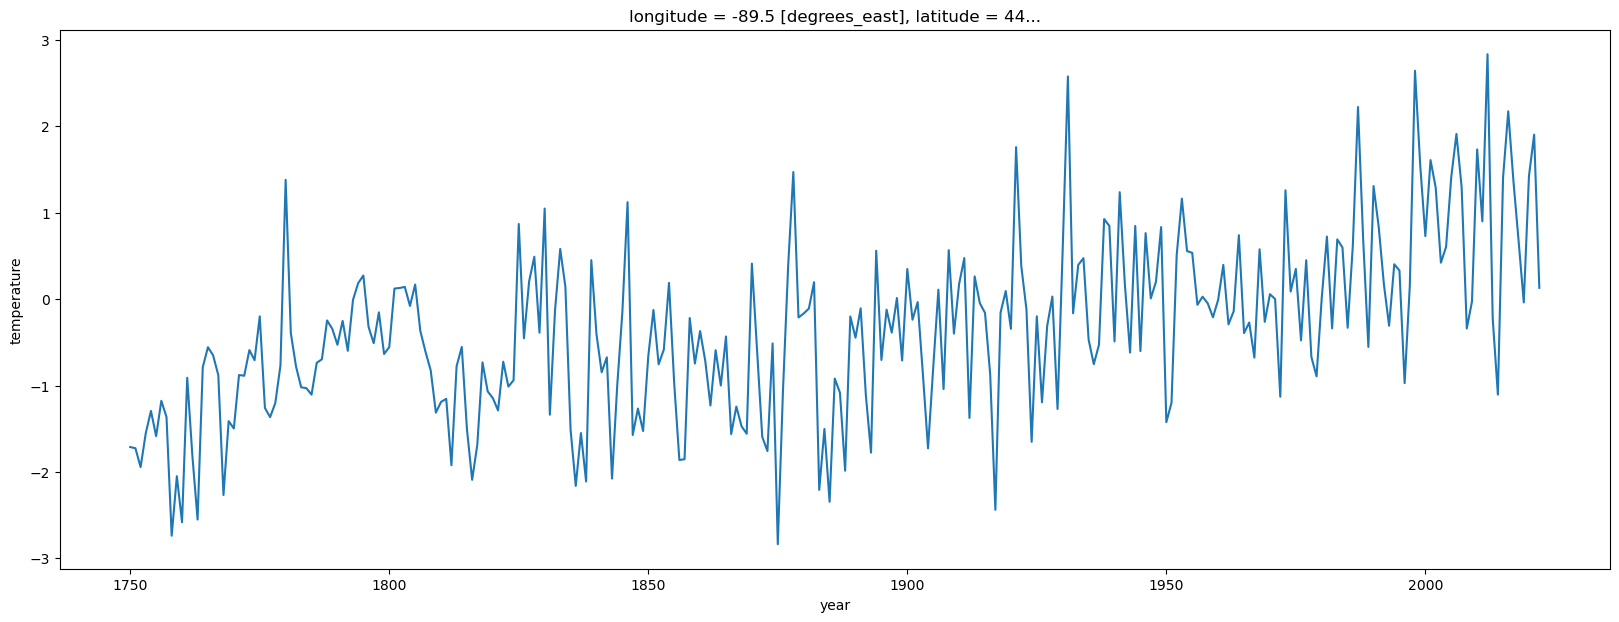

In [249]:
state_mean(44.5, -89.5)